<a href="https://colab.research.google.com/github/besomlu/stock_study/blob/main/2_SPY%EC%9D%98_1%EB%85%84_%EC%88%98%EC%9D%B5%EB%A5%A0_%EB%B6%84%ED%8F%AC%ED%99%94_%EB%AA%A8%EC%82%AC_%EC%A0%95%EA%B7%9C%EB%B6%84%ED%8F%AC_%EA%B7%B8%EB%A6%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

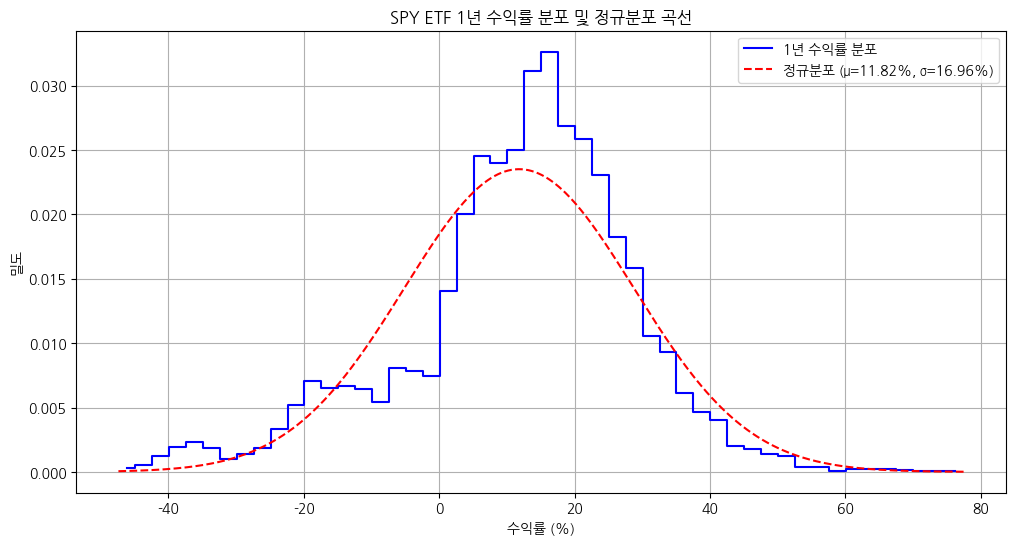

In [2]:
# 1. 한글 폰트 설치 및 설정
!apt-get -qq -y install fonts-nanum
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 설치된 폰트 경로 가져와서 matplotlib에 등록
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for f in font_files:
    fm.fontManager.addfont(f)

plt.rcParams['font.family'] = 'NanumGothic'  # matplotlib에서 한글 표시되도록 설정
plt.rcParams['axes.unicode_minus'] = False   # 음수도 정상 표시

# 2. FinanceDataReader 설치 및 SPY ETF 수정 종가 불러오기
!pip install -q finance-datareader
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
from scipy.stats import norm

# SPY 상장일 ~ 현재까지 데이터 로드
df = fdr.DataReader('SPY')
df = df[['Adj Close']]  # 수정 종가만 사용

# 3. 1년 수익률(252 거래일 기준) 계산
df['Return_1y'] = df['Adj Close'].pct_change(252)  # 1년 수익률
returns = df['Return_1y'].dropna() * 100           # 수익률을 %로 변환

# 4. 수익률 분포 시각화 (계단형 그래프 + 정규분포)
plt.figure(figsize=(12, 6))

# Step histogram
counts, bin_edges = np.histogram(returns, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.step(bin_centers, counts, where='mid', label='1년 수익률 분포', color='blue')

# Normal distribution curve
mu, std = returns.mean(), returns.std()
x = np.linspace(returns.min(), returns.max(), 500)
pdf = norm.pdf(x, mu, std)
plt.plot(x, pdf, 'r--', label=f'정규분포 (μ={mu:.2f}%, σ={std:.2f}%)')

plt.title('SPY ETF 1년 수익률 분포 및 정규분포 곡선')
plt.xlabel('수익률 (%)')
plt.ylabel('밀도')
plt.legend()
plt.grid(True)
plt.show()


Google Colab에서 실행 가능한 파이썬 코드를 만들어줘. 아래 조건을 모두 만족해야 해:
​
1. 나눔고딕 폰트를 설치하고 폰트매니저에 설치된 폰트를 모두 등록할 것. matplotlib에서 한글이 잘 보이도록 설정할 것
2. FinanceDataReader를 설치 후, 사용하고 FinanceDataReader에도 Adj Close가 있으므로 SPY
 ETF의 수정 종가(Adj Close)만을 불러올 것
3. 전체 거래 기간(상장일 ~ 현재) 데이터를 사용할 것
4. 1년 수익률을 계산하고, 수익률을 %로 변환할 것
5. 수익률 분포를 step 함수로 시각화하고, 정규분포를 모사한 곡선을 함께 그릴 것